## Observations and Insights 

1. Based on the number of mice per treatment, drug regimens Capomulin and Ramicane showed a significant reduction in tumor volume, suggesting that mice treated by Capomulin and Ramicane had a higher chance of survival.
2. Drug regimen Propriva was less effective at reducing tumor volume and metastatic spread than the placebo in this sample of mice treated.
3. Mice that weighed less, and treated with the Capomulin regimen, showed a reduction in tumors. This signified that mouse weight had an indicative importance on average tumor volume.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_and_study_data = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")
mouse_and_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame
unique_ids = mouse_and_study_data["Mouse ID"].unique()
x = len(unique_ids)
print(x)

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_series = mouse_and_study_data.duplicated(subset=['Mouse ID', 'Timepoint'])
dupl_mice_id = mouse_and_study_data.loc[duplicate_series,'Mouse ID'].unique()
dupl_mice_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID
dupl_id_data = mouse_and_study_data.loc[mouse_and_study_data['Mouse ID'] == "g989"]
dupl_id_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_df = mouse_and_study_data[mouse_and_study_data['Mouse ID'].isin(dupl_mice_id)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame
clean_ids = clean_df["Mouse ID"].unique()
y = len(clean_ids)
print(y)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Calculating the mean of the tumor volume for each regimen
tumorvolume_mean = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]

# Calculating the median of the tumor volume for each regimen
tumorvolume_median = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]

# Calculating the variance of the tumor volume for each regimen
tumorvolume_variance = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]

# Calculating the standard deviation of the tumor volume for each regimen
tumorvolume_std = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]

# Calculating the SEM of the tumor volume for each regimen
tumorvolume_sem = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# This method is the most straighforward, creating multiple series and putting them all together at the end.

# Creating a DataFrame for the data
summary_stats_by_regimen = pd.DataFrame({
    "Mean Tumor Volume": tumorvolume_mean,
    "Median Tumor Volume": tumorvolume_median,
    "Tumor Volume Variance": tumorvolume_variance,
    "Tumor Volume Std Dev": tumorvolume_std,
    "Tumor Volume Std Err": tumorvolume_sem
})
summary_stats_by_regimen

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

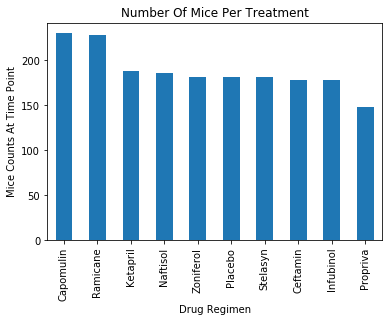

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
mice_counts = clean_df['Drug Regimen'].value_counts()
mice_counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Counts At Time Point")
plt.title("Number Of Mice Per Treatment")
plt.show()

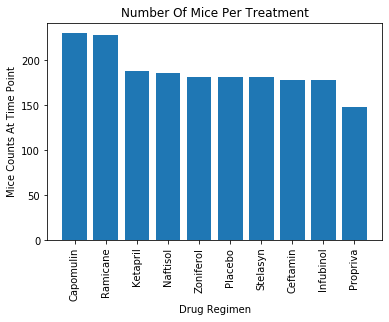

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
mice_counts = clean_df['Drug Regimen'].value_counts()
plt.bar(mice_counts.index.values, mice_counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Mice Counts At Time Point")
plt.title("Number Of Mice Per Treatment")
plt.show()

## Pie Plots

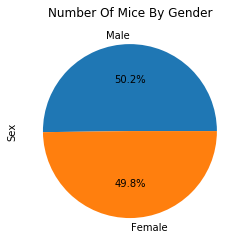

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_counts = mouse_metadata.Sex.value_counts()
gender_counts.plot(kind="pie", autopct='%1.1f%%')
plt.title("Number Of Mice By Gender")
plt.show()

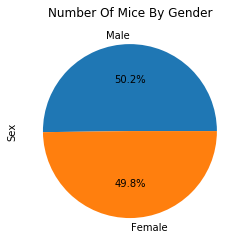

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = mouse_metadata.Sex.value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index.values, autopct='%1.1f%%')
plt.title("Number Of Mice By Gender")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Calculating the last (greatest) timepoint for each mouse
max_tumor = clean_df.groupby(["Mouse ID"]).max()
max_tumor = max_tumor.reset_index()
merged_data = max_tumor[['Mouse ID','Timepoint']].merge(clean_df,on=['Mouse ID','Timepoint'],how="left")

# Accessing rows by drug regimen and tumor volume (mm3)
capomulin = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
ceftamin = merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"] 
infubinol = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
ramicane = merged_data.loc[merged_data["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]

In [14]:
# Capomulin IQR
capomulin_quantiles = capomulin.quantile([.25,.5,.75])
cap_lowerq = capomulin_quantiles[.25]
cap_upperq = capomulin_quantiles[.75]
cap_iqr = cap_upperq - cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)

# Ceftamin IQR
ceftamin_quantiles = ceftamin.quantile([.25,.5,.75])
cef_lowerq = ceftamin_quantiles[.25]
cef_upperq = ceftamin_quantiles[.75]
cef_iqr = cef_upperq - cef_lowerq
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)

# Infubinol IQR
infubinol_quantiles = infubinol.quantile([.25,.5,.75])
inf_lowerq = infubinol_quantiles[.25]
inf_upperq = infubinol_quantiles[.75]
inf_iqr = inf_upperq - inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)

# Ramicane IQR
ramicane_quantiles = ramicane.quantile([.25,.5,.75])
ram_lowerq = ramicane_quantiles[.25]
ram_upperq = ramicane_quantiles[.75]
ram_iqr = ram_upperq - ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)

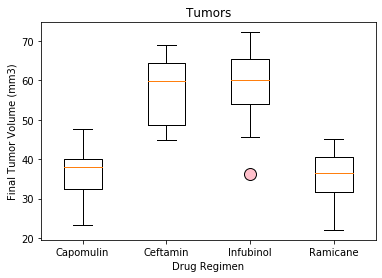

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([capomulin, ceftamin, infubinol, ramicane], labels=["Capomulin", "Ceftamin", "Infubinol", "Ramicane"], flierprops=dict(markerfacecolor='pink',markersize=12))
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.title("Tumors")
plt.show()

## Line and Scatter Plots

In [16]:
# Printing merged data set to locate a specific mouse ID treated with drug regimen Capomulin
# mouse_and_study_data.head(20)

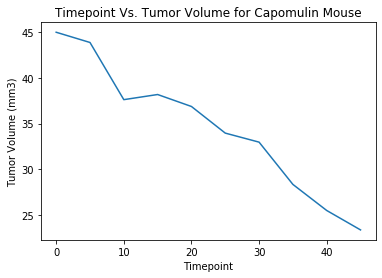

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Calculating line plot based on a single mouse ID treated with Capomulin
tumor_volume_per_regimen = mouse_and_study_data[mouse_and_study_data["Mouse ID"].isin(["s185"])]
tumor_volume_per_regimen

# Plotting scatter and determining labels and title
plt.plot(tumor_volume_per_regimen["Timepoint"],tumor_volume_per_regimen["Tumor Volume (mm3)"])
plt.title('Timepoint Vs. Tumor Volume for Capomulin Mouse')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

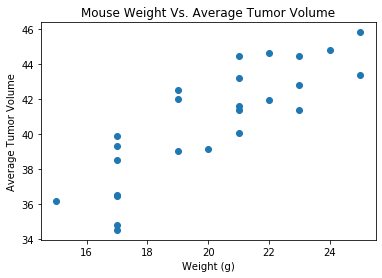

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Calculating mouse weight versus average tumor volume for the Capomulin regimen
capomulin = mouse_and_study_data.loc[mouse_and_study_data["Drug Regimen"] == "Capomulin"]
weight_of_mouse = capomulin.groupby(capomulin["Mouse ID"])["Weight (g)"].mean()
average_tumor_volume = capomulin.groupby(capomulin["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Plotting scatter and determining labels and title
plt.scatter(weight_of_mouse,average_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.title('Mouse Weight Vs. Average Tumor Volume')
plt.show()

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculating correlation coefficient
cap_df = mouse_and_study_data.loc[mouse_and_study_data["Drug Regimen"] == "Capomulin",:]
capomulin_average = capomulin.groupby(['Mouse ID']).mean()
correlation=round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)

# Printing correlation coefficient
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {correlation}.")

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84.


In [20]:
# Calculating linear regression result
lin_regress_model=st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
lin_regress_model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

In [21]:
# Setting slope and intercept
slope = 0.9544396890241045
intercept = 21.552160532685015

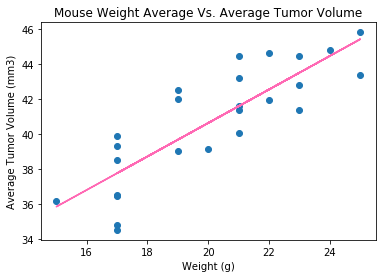

In [22]:
# Setting Y values
y_values = capomulin_average['Weight (g)']*slope+intercept
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])

# Plotting regression and determining labels and title
plt.plot(capomulin_average['Weight (g)'],y_values,color="hotpink")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight Average Vs. Average Tumor Volume')
plt.show()